In [717]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [718]:
df = pd.read_csv('train.csv')
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


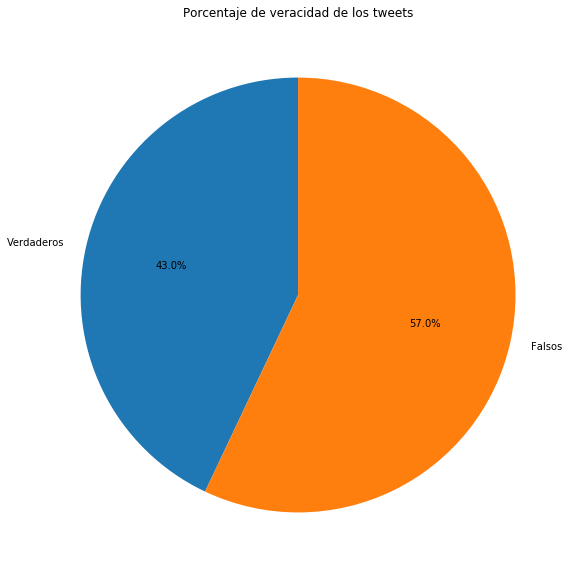

In [719]:
tweets_reales_count = df[tweets['target'] == 1]['target'].count()
tweets_falsos_count = df[tweets['target'] == 0]['target'].count()
grafico = plt.pie([tweets_reales_count, tweets_falsos_count],labels=['Verdaderos', 'Falsos'], startangle=90, autopct='%1.1f%%')
plt.title("Porcentaje de veracidad de los tweets")
plt.show(grafico)

In [720]:
df['largo_del_texto'] = df['text'].apply(len)
df['mencion'] = df['text'].str.contains('@').astype(int)
df['hashtag'] = df['text'].str.contains('#').astype(int)
df['url'] = df['text'].str.contains('http').astype(int)
df['Sin palabras clave'] =  ((df['text'].str.contains('@') == False) & \
(df['text'].str.contains('#')  == False) & \
(df['text'].str.contains('http') == False)).astype(int)
df.tail(100) 


,id,keyword,location,text,target,largo_del_texto,mencion,hashtag,url,Sin palabras clave
7513,10746,wreckage,NaN,KUALA LUMPUR (Reuters) - A piece of a wing tha...,1,139,0,0,0,1
7514,10747,wreckage,NaN,#science Now that a piece of wreckage from fli...,1,137,0,1,1,0
7515,10748,wreckage,Africa,Malaysia PM confirms wreckage belongs to MH370...,1,92,0,0,1,0
7516,10749,wreckage,NaN,Wreckage 'Conclusively Confirmed' as From MH37...,1,136,0,0,1,0
7517,10750,wreckage,"Mumbai, Maharashtra",Wreckage 'Conclusively Confirmed' as From MH37...,1,136,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,0,0,1,0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,1,0,0,0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,0,0,1,0
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,0,0,0,1


In [721]:
cant_verdaderos = df[df['target'] == 1]['target'].count()
cant_falsos = df[df['target'] == 0]['target'].count()
tweets_red = df[['target', 'mencion', 'hashtag', 'url', 'Sin palabras clave']]
plotdata = tweets_red.groupby('target').agg({'url': 'sum', 'mencion':  'sum', 'hashtag': 'sum', 'Sin palabras clave': 'sum'})
plotdata.columns = ['Contiene URL(http)', 'Contiene mención(@user)', 'Contiene Hashtag(#)', 'Sin palabras clave']
plotdata = plotdata.transpose()
plotdata[0] = plotdata[0]*100/cant_falsos
plotdata[1] = plotdata[1]*100/cant_verdaderos
plotdata.columns = ['Tweets falsos', 'Tweets verdaderos']
#plotdata = plotdata[plotdata.columns[::-1]] #Cambio el orden de las columnas
plotdata

,Tweets falsos,Tweets verdaderos
Contiene URL(http),41.432520,66.401712
Contiene mención(@user),31.391064,20.666463
Contiene Hashtag(#),20.405343,26.750229
Sin palabras clave,30.561953,15.805564


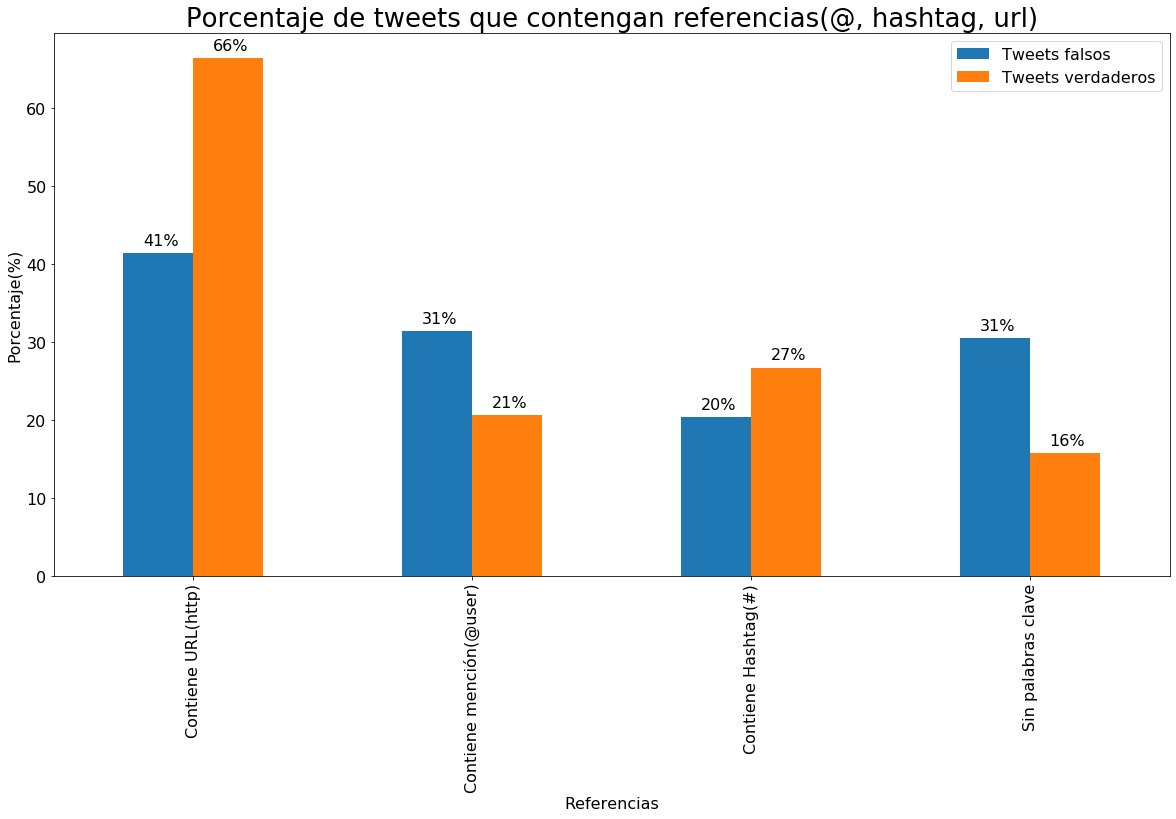

In [722]:
ax = plotdata.plot(kind="bar", stacked=False, fontsize= 16)
plt.title("Porcentaje de tweets que contengan referencias(@, hashtag, url)", fontsize=26)
plt.xlabel("Referencias", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.0%}".format(height/100), xy=(x+0.07, y + height + 1), fontsize=16)

# Relación entre las palabras clave y target

In [723]:
df.info()
ranking = 70

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  7613 non-null   int64 
 1   keyword             7552 non-null   object
 2   location            5080 non-null   object
 3   text                7613 non-null   object
 4   target              7613 non-null   int64 
 5   largo_del_texto     7613 non-null   int64 
 6   mencion             7613 non-null   int64 
 7   hashtag             7613 non-null   int64 
 8   url                 7613 non-null   int64 
 9   Sin palabras clave  7613 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 594.9+ KB


In [724]:
ndf = df.groupby(['keyword', 'target']).agg({'target': 'count'})
ndf = ndf.unstack(level=1)
ndf = ndf.reset_index()
ndf = ndf.droplevel(0, axis=1)
ndf.columns=['keyword', 'Tweets falsos', 'Tweets verdaderos'] 
ndf['Tweets verdaderos'].fillna(0, inplace=True)
ndf['Tweets falsos'].fillna(0, inplace=True)
ndf['keyword'].fillna('empty', inplace=True)
ndf = ndf.set_index('keyword')
ndf = ndf[(ndf['Tweets verdaderos'] + ndf['Tweets falsos']) > 30] # Aparición de 'keyword' mayor a 30 veces
ndf = ndf.apply(lambda x: x*100/sum(x), axis=1)
top_falsos = ndf.sort_values('Tweets falsos', ascending=False).head(ranking)
top_verdaderos = ndf.sort_values('Tweets verdaderos', ascending = False).head(ranking)
top_verdaderos

,Tweets falsos,Tweets verdaderos
keyword,,
wreckage,0.000000,100.000000
debris,0.000000,100.000000
derailment,0.000000,100.000000
outbreak,2.500000,97.500000
oil%20spill,2.631579,97.368421
...,...,...
collided,42.500000,57.500000
police,43.243243,56.756757
burning%20buildings,43.243243,56.756757


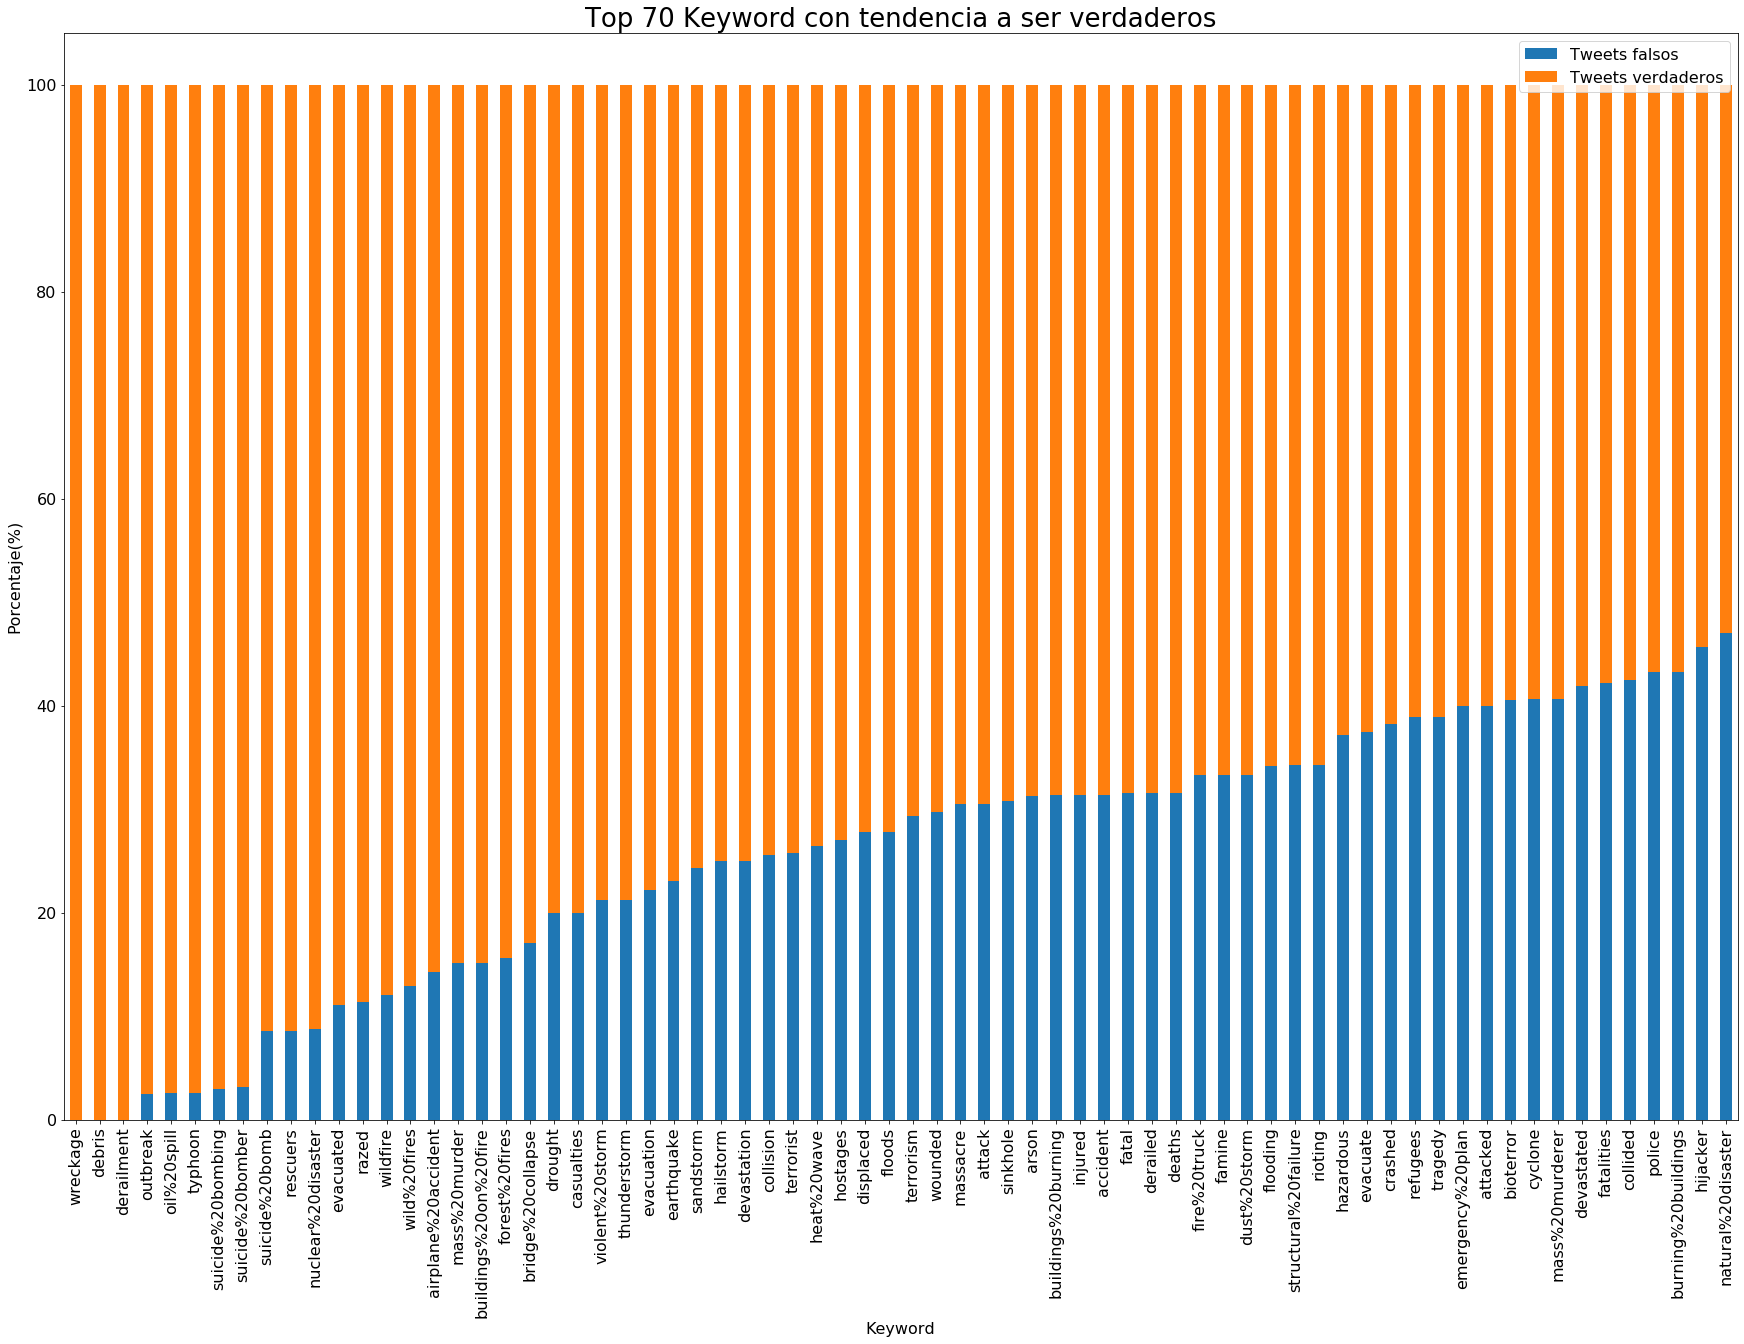

In [725]:
ax = top_verdaderos.plot(kind="bar", stacked=True, fontsize= 16, figsize=(30, 20))
plt.title('Top '+str(ranking)+' Keyword con tendencia a ser verdaderos', fontsize=26)
plt.xlabel("Keyword", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)

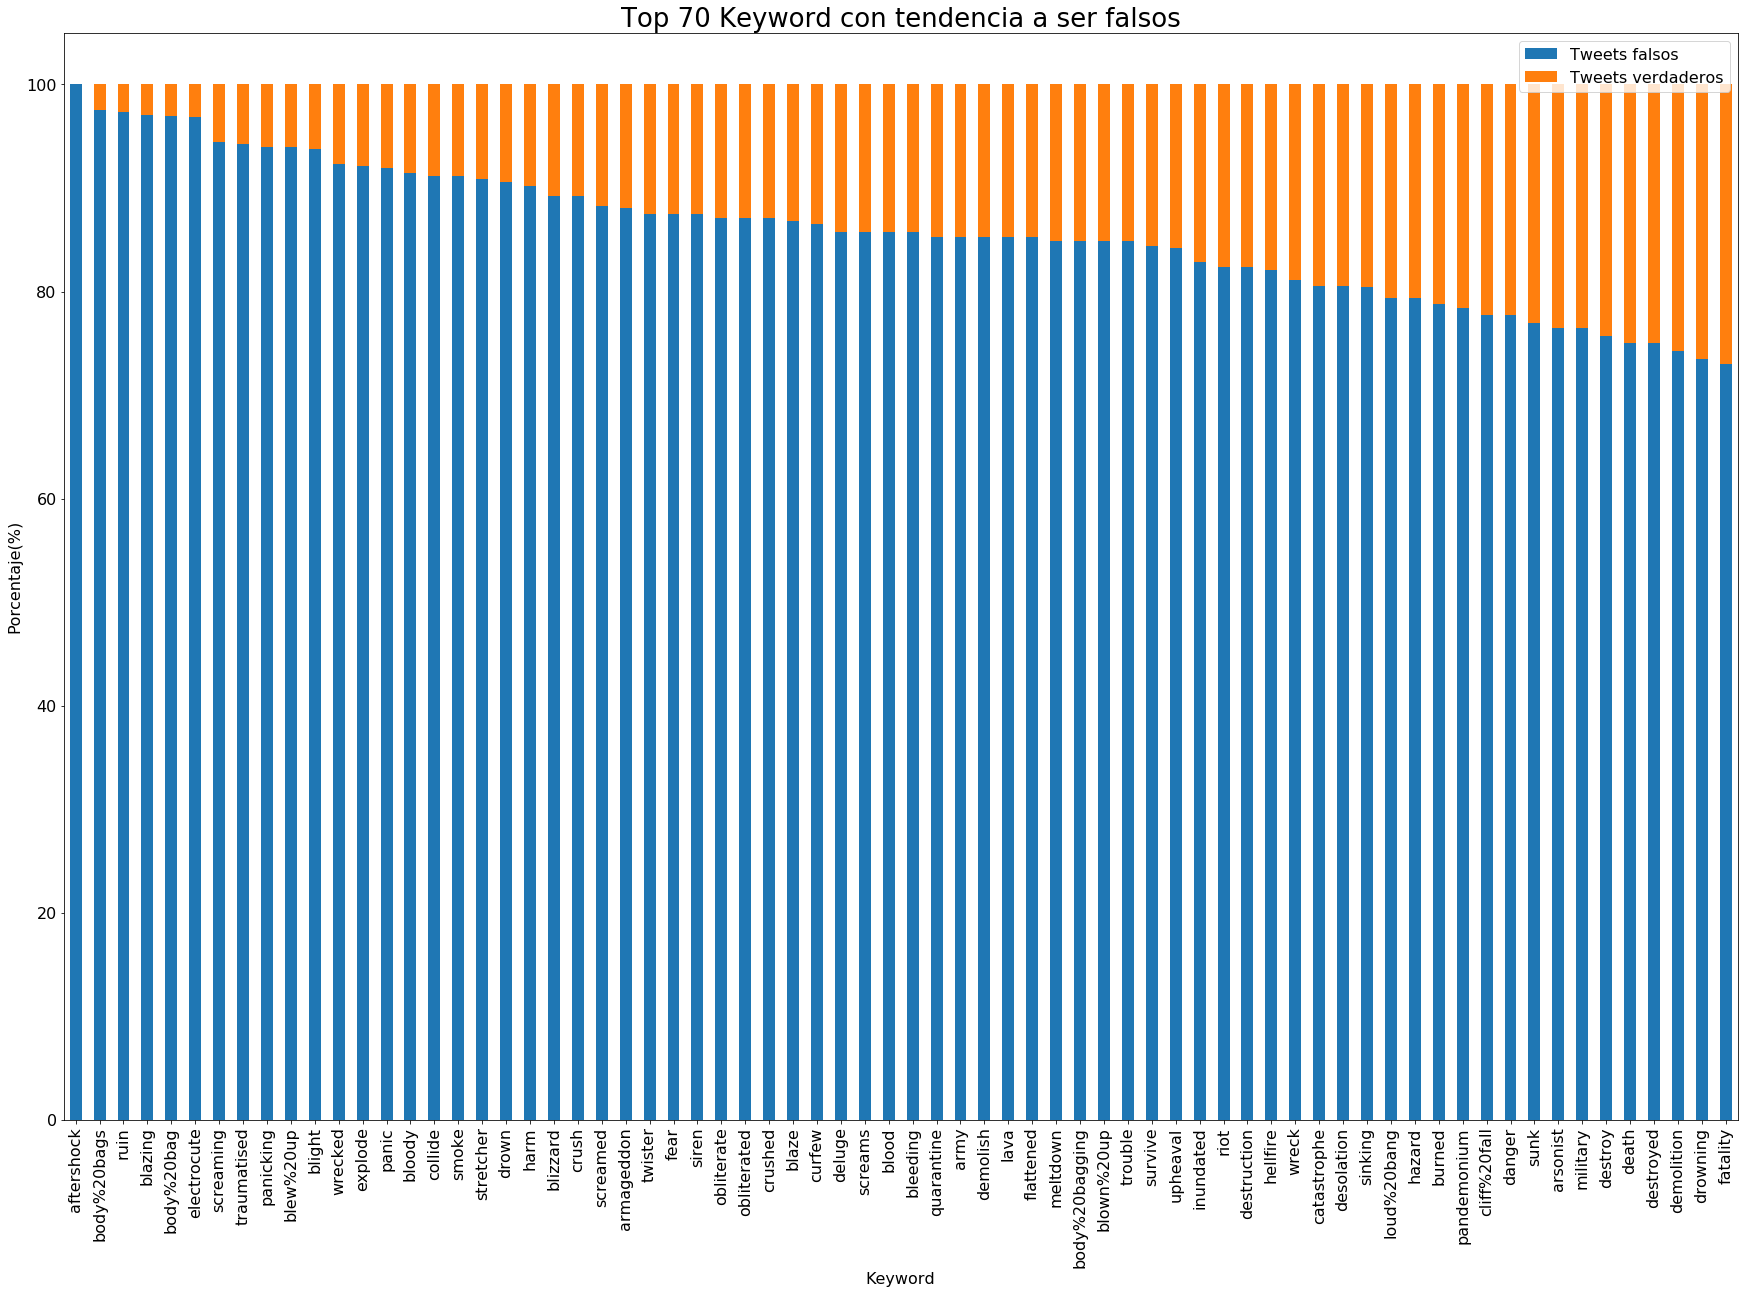

In [727]:
ax = top_falsos.plot(kind="bar", stacked=True, fontsize= 16, figsize=(30, 20))
plt.title('Top '+str(ranking)+' Keyword con tendencia a ser falsos', fontsize=26)
plt.xlabel("Keyword", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)